# Understanding Apple Quality: A Prediction Based on Ripeness and Acidity


# Introduction
Apples are one of the most popular fruits being sold today in markets across the world. With hundreds of different types of apples being sold worldwide. With each apple sold, it has it’s own unique characteristics from its size to weight to juciness to acidity all of which play into if an apple is of good quality or not. 

   When researching, we wanted to create a predictive model that allowed us to predict whether an apple’s quality using selected variables that we believed had the potential to influence whether it would be rated as good or bad quality. 

   Using data classification, our goal to create a model to predict an Apple’s quality classification (good or bad) based on the variables of an apple’s acidity and ripeness values. All of the data used for this project has been retrieved from an Apple Quality data set from database repository: Kaggle. Full database can be found here: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality/data

## Classification Question
Predictive Question: How does the acidity and ripeness values of any given apple, influence it’s overall quality status (good or bad)? 

The dataset we had chosen is comprised of a variety of attributes of any given apple namely: size, weight, sweetness, crunchiness, juiciness, ripeness, acidity, and quality with quality being the only qualitative variable in the data set. To our knowledge, all observations have complete data with no “N/As” or blank. 


# Methods
We will conduct our data analysis by subsetting our dataset to the variables that are likely to yield the desired results. Variables such as count (number of apples), ripeness, acidity, and quality of the apple. We want to predict an apple’s quality in terms of its ripeness and acidity based on the classification model. 

Here, we will build a model to find the perfect K with the highest accuracy estimation. We will first split the dataset into two parts, training data and testing data. To tune data, we will do cross-validation by using vfold function. After standardizing the data, we will get the mean of each group's accuracy, select the most promising one, and finally find the K. 

For visualizations, we will also make a scatterplot, whose x-axis is neighbors and y-axis is mean to visualize the accuracy of K. Next, we want to use this K to find the accuracy of this classification model by testing the testing data. Finally, we can predict the quality of the new apple with the workflow function.


# Preliminary Exploratory Data Analysis

In [9]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
set.seed(3456)

In [63]:
apples_data <- read_csv("data/apple_quality.csv") |>
    head(-1) #removes the last row of the data set which contains credits and NA values
apples_data
apples_select <- apples_data |>
    select(A_id, Ripeness, Acidity, Quality) |>
    mutate(Acidity = as.numeric(Acidity)) |>
    sample_n(1000)
apples_select

Rows: 4001 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Acidity, Quality
dbl (7): A_id, Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


A_id Size       Weight    Sweetness  Crunchiness Juiciness Ripeness   
1    0    -3.9700485 -2.512336  5.346330  -1.0120087  1.8449004  0.32983980
2    1    -1.1952172 -2.839257  3.664059   1.5882323  0.8532858  0.86753008
3    2    -0.2920239 -1.351282 -1.738429  -0.3426159  2.8386355 -0.03803333
⋮    ⋮    ⋮          ⋮         ⋮          ⋮           ⋮         ⋮          
3998 3997 -2.6345153 -2.138247 -2.4404613  0.6572229  2.199709   4.7638592 
3999 3998 -4.0080037 -1.779337  2.3663970 -0.2003294  2.161435   0.2144884 
4000 3999  0.2785397 -1.715505  0.1212173 -1.1540748  1.266677  -0.7765715 
     Acidity      Quality
1    -0.491590483 good   
2    -0.722809367 good   
3    2.621636473  bad    
⋮    ⋮            ⋮      
3998 -1.334611391 bad    
3999 -2.229719806 good   
4000 1.599796456  good

A_id Ripeness   Acidity     Quality
1    3752 -2.0037048  0.2634829  good   
2    3002  0.2938264 -0.6002720  good   
3    3073  3.0350923 -0.6803350  bad    
⋮    ⋮    ⋮          ⋮           ⋮      
998   265 -0.2971266  1.33800814 bad    
999  1221 -0.4666785 -0.03053309 bad    
1000 1970  3.8298233 -0.14237484 good

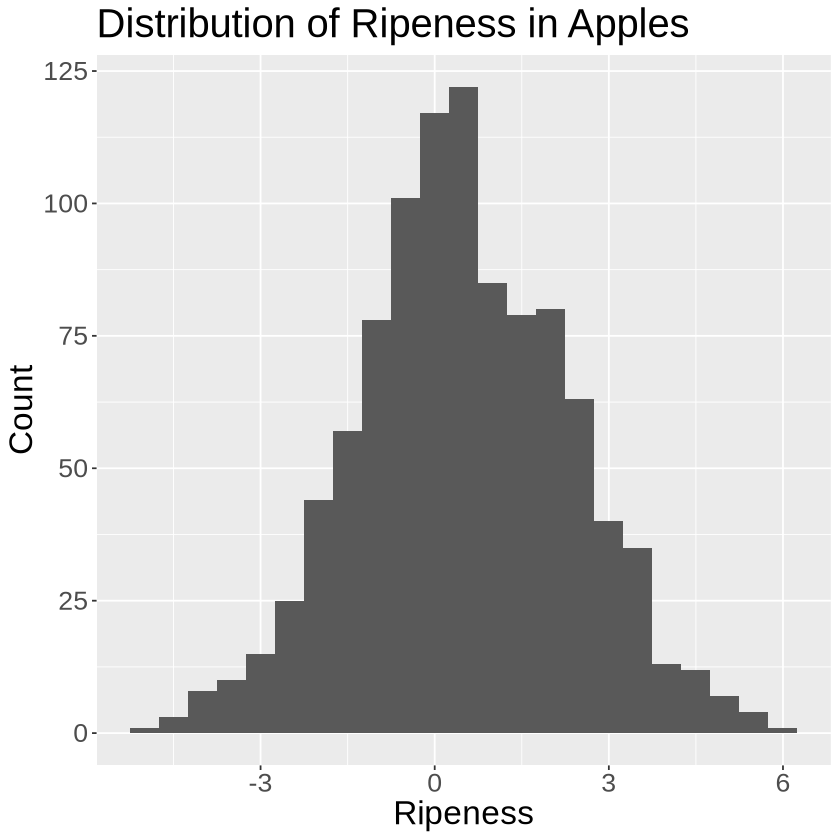

In [42]:
apples_hist_ripe <- apples_select |>
    ggplot(aes(x = Ripeness)) +
    geom_histogram(binwidth = 0.5) +
    labs(x = "Ripeness", y = "Count") +
    ggtitle("Distribution of Ripeness in Apples") +
    theme(text = element_text(size = 20))
apples_hist_ripe

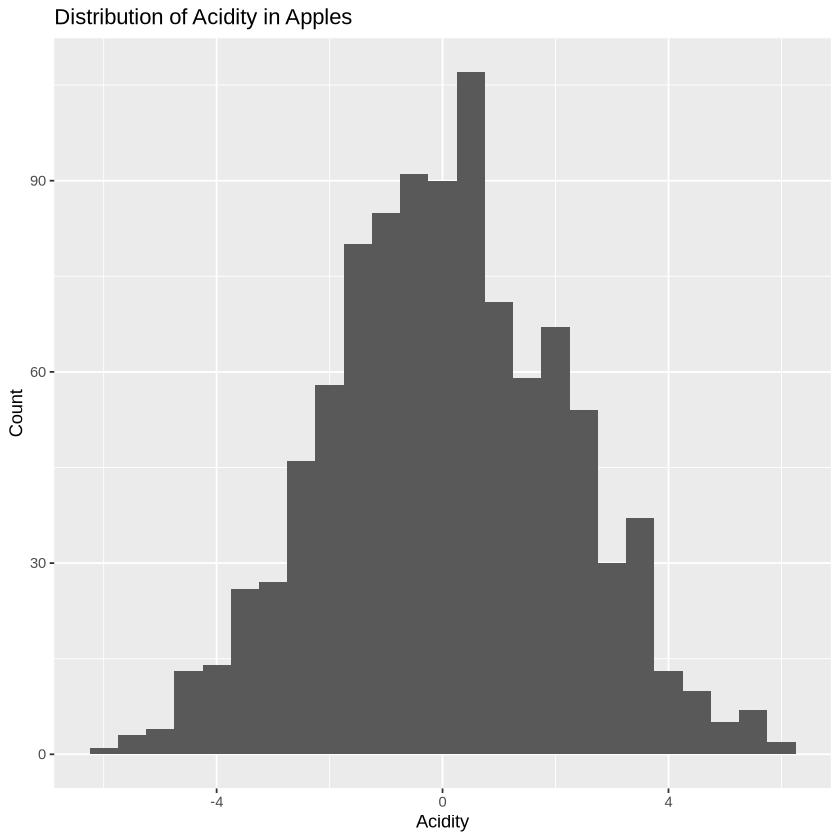

In [56]:
apples_hist_acidity <- apples_select |>
    ggplot(aes(x = Acidity)) +
    geom_histogram(binwidth = 0.5) +
    labs(x = "Acidity", y = "Count") +
    ggtitle("Distribution of Acidity in Apples") 
apples_hist_acidity

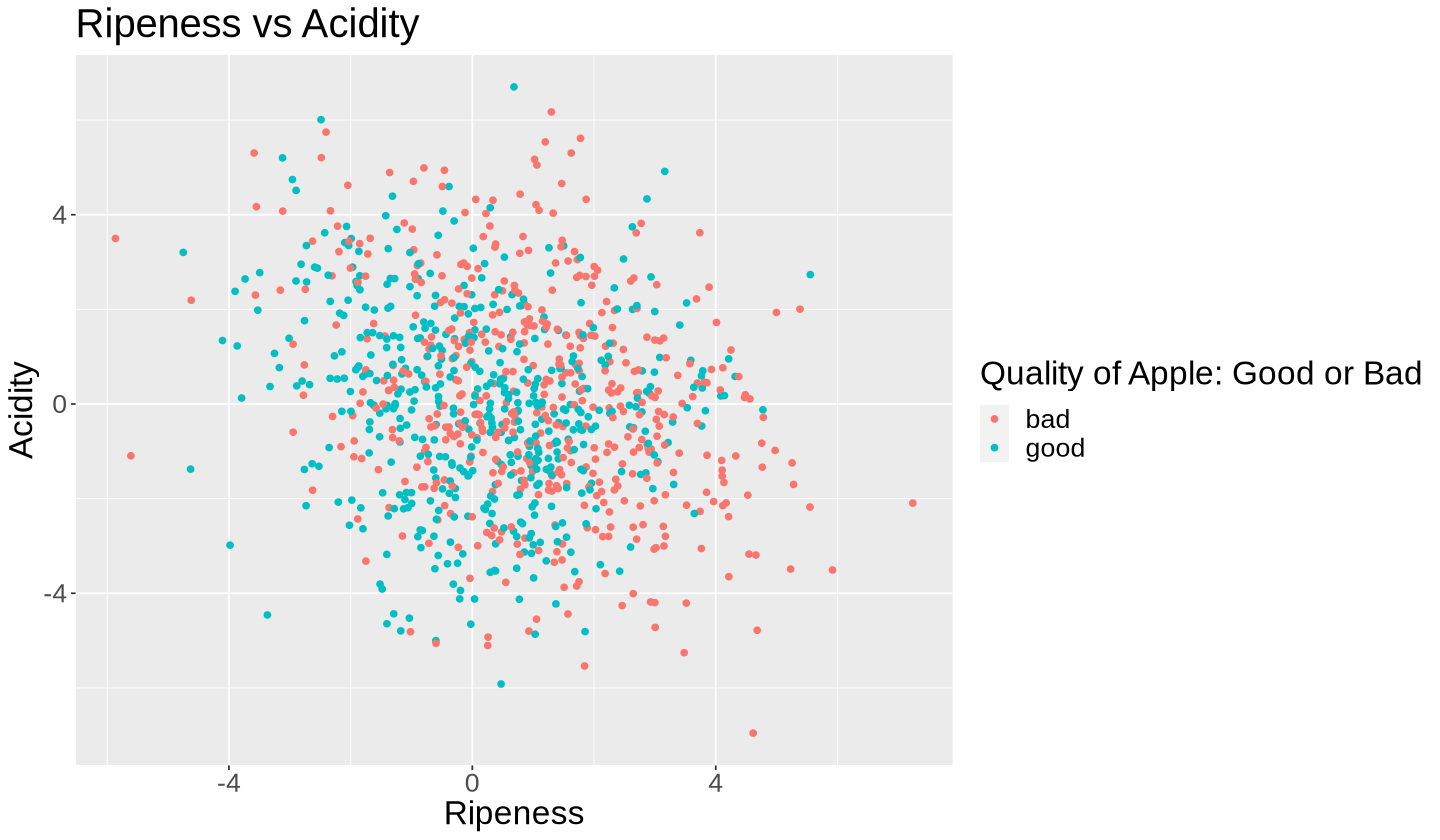

In [66]:
options(repr.plot.width = 12, repr.plot.height = 7)
apples_comparison_plot <- apples_select |>
    ggplot(aes(x = Ripeness, y = Acidity, colour = Quality)) +
    geom_point() +
    labs(x = "Ripeness", y = "Acidity", colour = "Quality of Apple: Good or Bad") +
    ggtitle("Ripeness vs Acidity") +
    theme(text = element_text(size = 20)) 
apples_comparison_plot 
# The relationship between Ripeness and Acidity cannot be inferred with a scatterplot because all data is standardized.

# Expected Outcomes and Significance
## Hypothesized Outcome

Based on our preliminary general knowledge that we have on the market and properties of apples, we expect that acidity levels have crucial influence on the perceived quality of an apple. We expect that apples with relatively higher acidity levels will likely end up being classified as bad qualities compared to apples with lower acidity levels. Moreover, we believe that apples with higher ripeness values would most likely end up being classified as good quality since ripeness varies per apple and most fruits are sold at a certain ripeness level before they eventually become overripe and become rotten.

## Why is studying apples so important?

We believe that knowing how properties like acidity levels affect perceived quality levels of fruits like apples, can paint a clearer picture on not only how quality is determined but could also be the foundation for future research on how to either lower or higher acidity levels to ensure more “good” quality apples are produced. In addition, this experiment can help us determine what is the "ideal" ripeness and acidity level for which an apple is most likely going to be considered as "good" quality while possibly being able to determine the thresholds where "bad" quality apples become more frequent.

Furthermore, this experiment could serve as future grounds for research that could dive deeper into the health impacts of such properties when the apples are consumed or the production process of apples.
